# Course Project Part 1C - Forecasting & Data Visualizations

To predict future trends in smoke impact from wildfires, I used the **Prophet** model developed by Meta. Time series forecasting with Prophet allows us to capture patterns and trends in historical data to make predictions for the future. This is particularly useful for understanding the potential smoke impact from wildfires in Gresham, OR, and preparing for future challenges.


# Step 0: Loading the Data
First, I begin by loading in the data and the required modules.

In [3]:
import os, json, time
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
import re
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet

In [4]:
# Pulling the data again to get the annual smoke impact estimates 
smoke_data = pd.read_csv('intermediary_files/smoke_impact_estimates1.csv')

# fires within 650, used for smoke estimate
close_fires_df = smoke_data[smoke_data['Distance_to_City_Miles'] <= 650]
close_fires_df["Year"] = close_fires_df["Year"].astype(int)

# calculating the total smoke impact per year by summing impacts for each year
annual_smoke_impact = close_fires_df.groupby("Year")["Smoke_Impact"].sum().reset_index(name='total_smoke_impact')

/var/folders/j_/vc3ydh9x0l3dty8vdsjkb0_80000gn/T/ipykernel_6952/2879159061.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_fires_df["Year"] = close_fires_df["Year"].astype(int)


## Predictive Model to Forecast Smoke Impact
### ChatGPT Generated Code
### Time Series Modeling for Smoke Impact Forecasting
Prompt: Using aqi_df, I want to predict the future smoke impact trends for 2024-2025 using a time series model. I have looked into Prophet by Meta. It was further prompted with questions on how to implement it after viewing the correlation/significance.

### Model Selection and Rationale

For this forecast, I transitioned to the **Prophet** time series model because of its flexibility in handling seasonality, missing data, and outliers. Prophet is also robust to sudden changes in trends, which is crucial given the variability in smoke impact caused by wildfire activity. Unlike ARIMA, Prophet simplifies parameter selection and provides intuitive outputs, making it easier to integrate into public health analyses.

### Steps in the Analysis

1. **Data Preparation**: 
   - Historical smoke impact data was reformatted to match Prophet’s input format (`ds` for dates and `y` for the target variable). 
   - Outliers, such as the anomalous smoke impact from 2020, were removed to improve forecast reliability.

2. **Model Training**:
   - The Prophet model was trained on historical smoke impact data spanning the available years. 
   - This process identified underlying trends in smoke impact while accounting for yearly variations.

3. **Forecasting**:
   - Using the trained model, forecasts were generated for the years 2025 to 2050.
   - The forecast includes both predicted values (`yhat`) and confidence intervals (`yhat_lower` and `yhat_upper`), providing a range of expected smoke impacts.

4. **Visualization**:
   - Historical data and forecasted values were plotted together, with confidence intervals shaded to show potential variability in predictions.
   - An additional vertical line was added to mark the end of historical data, providing clear context for where the forecasts begin.

### Adjustments for Improved Accuracy

Removing the 2020 outlier was critical to improve the reliability of the forecast, as this anomalous year could skew the model’s predictions. Prophet’s built-in handling of outliers and missing data further ensured that the model’s outputs were robust and interpretable.


This model offers a more user-friendly and adaptable approach than ARIMA, particularly for analyzing non-linear trends in environmental data like wildfire smoke impact.

23:11:06 - cmdstanpy - INFO - Chain [1] start processing


23:11:06 - cmdstanpy - INFO - Chain [1] done processing


           ds           y
54 2015-01-01   80.062798
55 2016-01-01   31.894191
56 2017-01-01  270.888894
57 2018-01-01  113.459078
58 2019-01-01   14.002726


/var/folders/j_/vc3ydh9x0l3dty8vdsjkb0_80000gn/T/ipykernel_6952/1510372802.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_years_no_outlier = pd.DataFrame({"ds": pd.date_range(start="2025-01-01", end="2050-12-31", freq="Y")})


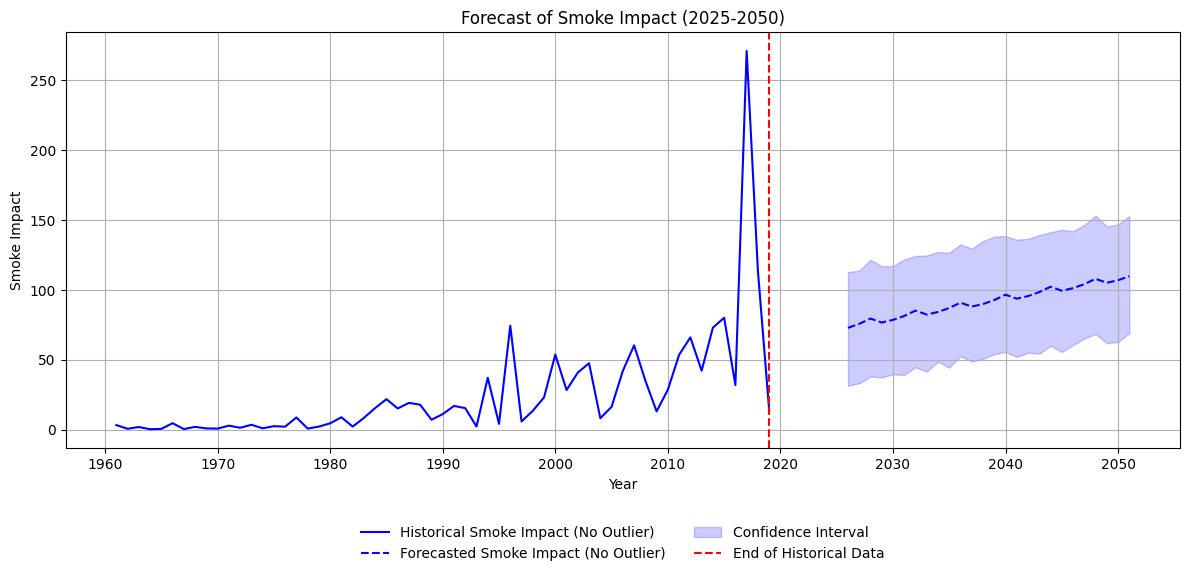

In [12]:
# Remove the outlier for the year 2020
# Assuming the outlier is in the last year of the dataset
prophet_data_full = annual_smoke_impact.rename(columns={"Year": "ds", "total_smoke_impact": "y"})
prophet_data_full["ds"] = pd.to_datetime(prophet_data_full["ds"], format="%Y")
prophet_data_full_no_outlier = prophet_data_full[prophet_data_full["ds"] != pd.Timestamp("2020-01-01")]

# # Check if the outlier is removed
# print(prophet_data_full_no_outlier.tail())

# Re-train the Prophet model without the outlier
prophet_model_no_outlier = Prophet()
prophet_model_no_outlier.fit(prophet_data_full_no_outlier)

# Re-forecast smoke impact for 2025-2050
future_years_no_outlier = pd.DataFrame({"ds": pd.date_range(start="2025-01-01", end="2050-12-31", freq="Y")})
prophet_forecast_no_outlier = prophet_model_no_outlier.predict(future_years_no_outlier)

# Plot historical and forecasted smoke impact without the outlier
plt.figure(figsize=(12, 6))
# Historical data
plt.plot(prophet_data_full_no_outlier["ds"], prophet_data_full_no_outlier["y"], label="Historical Smoke Impact (No Outlier)", linestyle="-", color="blue")
# Forecasted data
plt.plot(prophet_forecast_no_outlier["ds"], prophet_forecast_no_outlier["yhat"], label="Forecasted Smoke Impact (No Outlier)", linestyle="--", color="blue")
# Confidence intervals
plt.fill_between(
    prophet_forecast_no_outlier["ds"],
    prophet_forecast_no_outlier["yhat_lower"],
    prophet_forecast_no_outlier["yhat_upper"],
    color="blue",
    alpha=0.2,
    label="Confidence Interval"
)

# Formatting
plt.axvline(x=prophet_data_full_no_outlier["ds"].max(), color='red', linestyle='--', label="End of Historical Data")
plt.xlabel("Year")
plt.ylabel("Smoke Impact")
plt.title("Forecast of Smoke Impact (2025-2050)",)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize aspects of your analysis
I am illustrating the work of my analysis with a few time series graphs. The wildfire data is annual, so my time series will be on an annual basis. All the time series should cover the analysis range defined above, but not the prediction range.
- Produce a histogram showing the number of fires occurring every 50 mile distance from  assigned city for all fires ranging up to 1800 miles away from your assigned city. My histogram indicates the distance cut-off for your modeling work as specified in Step 1.
- Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.
- Produce a time series graph containing your fire smoke estimates for your city and the AQI estimates for your city.


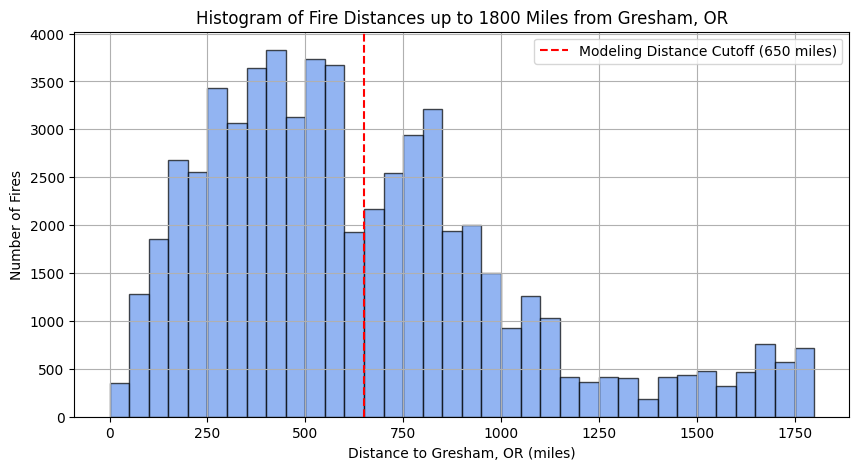

In [267]:
# using whole smoke_impact_df
smoke_impact_df = pd.read_csv('intermediary_files/smoke_impact_estimates1.csv')
distance_bins = range(0, 1850, 50)
fire_distances = smoke_impact_df["Distance_to_City_Miles"]
fire_distances_filtered = fire_distances[fire_distances <= 1800]

plt.figure(figsize=(10, 5))
plt.hist(fire_distances_filtered, bins=distance_bins, color = 'cornflowerblue', edgecolor='black', alpha=0.7)
plt.axvline(x=650, color='red', linestyle='--', label="Modeling Distance Cutoff (650 miles)")
plt.xlabel("Distance to Gresham, OR (miles)")
plt.ylabel("Number of Fires")
plt.title("Histogram of Fire Distances up to 1800 Miles from Gresham, OR")
plt.legend()
plt.grid(True)
plt.show()


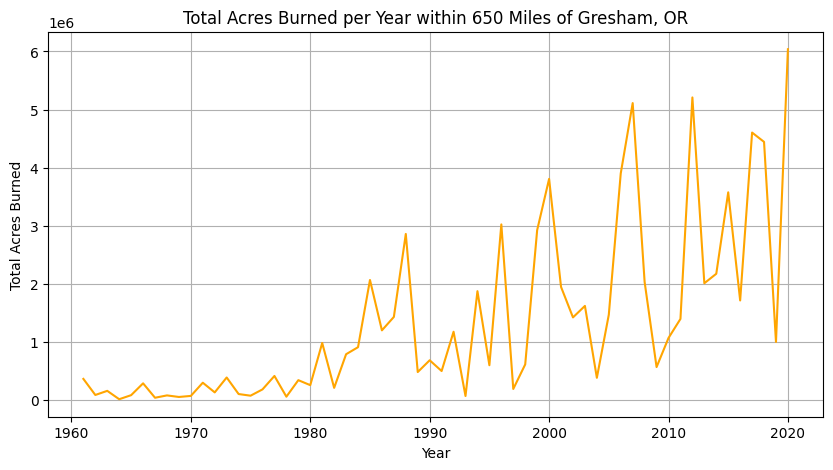

In [257]:
# this time we filter for fires within 650 miles
filtered_fires = smoke_impact_df[smoke_impact_df["Distance_to_City_Miles"] <= 650]

# group by Year and sum up acres
acres_burned_per_year = filtered_fires.groupby("Year")["Fire_Size_Acres"].sum()

plt.figure(figsize=(10, 5))
plt.plot(acres_burned_per_year.index, acres_burned_per_year.values, color="orange")
plt.xlabel("Year")
plt.ylabel("Total Acres Burned")
plt.title("Total Acres Burned per Year within 650 Miles of Gresham, OR")
plt.grid(True)
plt.show()

### Why Scale Smoke Impact and AQI?

Scaling both smoke impact and AQI values helps make them easier to compare visually:

1. **Consistent Range for Comparison**: Smoke impact and AQI might operate on different scales, so scaling them to [0, 1] allows us to put them on the same graph and see trends side-by-side.

2. **Focus on Patterns**: Scaling shifts the focus from raw values to patterns and relative changes. This way, we can more easily spot if peaks in smoke impact align with spikes in AQI, hinting at a connection.

3. **Clearer Interpretation**: With scaling, we can focus on whether the trends in both metrics move together over time, without one metric’s larger range overshadowing the other.

Overall, scaling makes the comparison between smoke impact and AQI trends clear and straightforward.


In [ ]:
# The goal is to compute the annual smoke impact by summing the smoke impact for each year
smoke_impact_2020 = close_fires_df[close_fires_df['Year'] == 2020]

# find the highest contributer to the smoke impact in 2020
max_smoke_impact_2020 = smoke_impact_2020['Smoke_Impact'].max()

# take maximum smoke impact for 2020 out
max_smoke_impact_row_2020 = smoke_impact_2020[smoke_impact_2020['Smoke_Impact'] == max_smoke_impact_2020]
modified_smoke_impact_df = smoke_impact_df[~((smoke_impact_df["Year"] == 2020) & (smoke_impact_df["Smoke_Impact"] == max_smoke_impact_2020))]


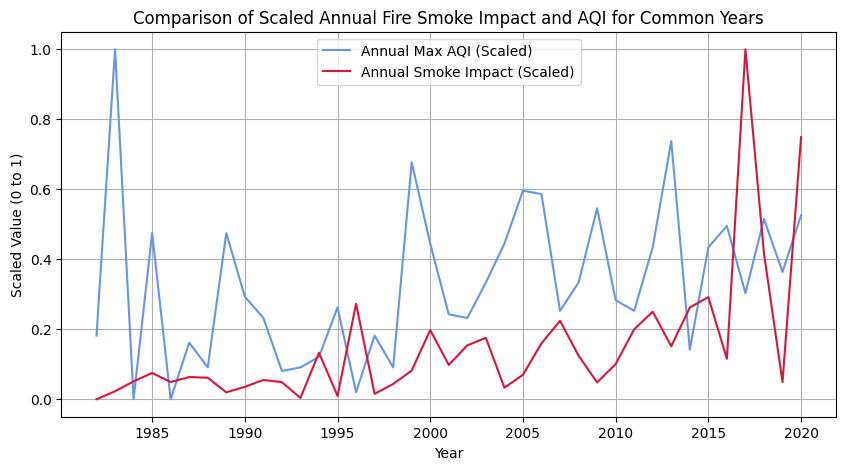

In [281]:
aqi_df = pd.read_csv("intermediary_files/particulate_aqi_summary.csv")

# filter to include only common years between the two DataFrames
common_years = set(aqi_df['Year']).intersection(set(modified_smoke_impact_df['Year']))

aqi_filtered = aqi_df[aqi_df['Year'].isin(common_years)]
smoke_impact_filtered = modified_smoke_impact_df[modified_smoke_impact_df['Year'].isin(common_years)]

# sum smoke impacts by year for smoke_impact_filtered
annual_smoke_impact = smoke_impact_filtered.groupby('Year')['Smoke_Impact'].sum()

aqi_filtered.set_index('Year', inplace=True)
annual_smoke_impact = annual_smoke_impact.sort_index()  # Ensuring years are sorted

aqi_series = aqi_filtered['Max_AQI_Wildfire']
smoke_impact_series = annual_smoke_impact

# scale both series to range [0, 1]
scaler = MinMaxScaler()
aqi_scaled = scaler.fit_transform(aqi_series.values.reshape(-1, 1)).flatten()
smoke_impact_scaled = scaler.fit_transform(smoke_impact_series.values.reshape(-1, 1)).flatten()

plt.figure(figsize=(10, 5))
plt.plot(aqi_series.index, aqi_scaled, label="Annual Max AQI (Scaled)", color="cornflowerblue")
plt.plot(smoke_impact_series.index, smoke_impact_scaled, label="Annual Smoke Impact (Scaled)", color="crimson")
plt.xlabel("Year")
plt.ylabel("Scaled Value (0 to 1)")
plt.title("Comparison of Scaled Annual Fire Smoke Impact and AQI for Common Years")
plt.legend()
plt.grid(True)
plt.show()
